<a href="https://colab.research.google.com/github/RLWH/tensorflow-certification-labs/blob/main/C1_W3_Lab_2_exploring_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Exploring Convolutions
In this lab, we will explore how convolutions work by creating a basic convolution on a 2D grayscale image. 

First, we will load the image by taking the [ascent](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.ascent.html) image from SciPy. Ascent will get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos. It is a nice, built-in picture with lots of angles and lines. 

In [ ]:
from scipy import misc

In [ ]:
# Load the ascent image
ascent_image = misc.ascent()

We can use the pyplot library to draw the image so we will know what it looks like. 

In [ ]:
print(f'Image size is: {ascent_image.shape}')
ascent_image 

Image size is: (512, 512)


array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

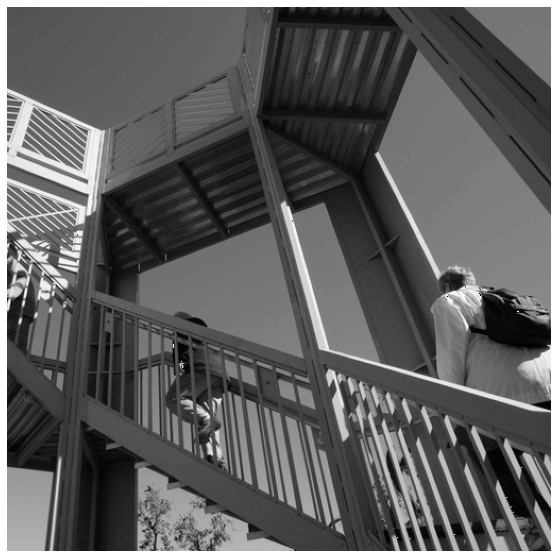

In [ ]:
import matplotlib.pyplot as plt

# visualise the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
plt.gray()
plt.axis('off')
ax.imshow(ascent_image)
plt.show()

# Create the Filter

In [ ]:
# Experiment with different values and see the effect
filter = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

    # Some other filter options to try
    # filter = [
    #     [-1, -2, -1],
    #     [0, 0, 0],
    #     [1, 2, 1]
    # ]

    # filter = [
    #     [-1, 0, 1],
    #     [-2, 0, 2],
    #     [-1, 0, 1]
    # ]

In [ ]:
# If all digits in the filter don't add up to 0 or 1
# we should probably do a weight to get it to do so. 
# For example, if our weights are [[1, 1, 1], [1, 2, 1], [1, 1, 1]], which adds up to 10
# Then we should set a weight of 0.1 to normalise them
weight = 1

# Creating a convolution
Now we can create a convolution. 

We will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neightoubrs of the current pixel by the value defined in the filter.  
(i.e. the current pixel's neighbour above it and to the left will be multiplied by the top left item in the filter, etc. )

We will then multiply the result by the weight, and then ensure the result is in the range 0-255. 

In [ ]:
import numpy as np

In [ ]:
# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [ ]:
"""
filter = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]
"""

# Iterate over the image,
# ignoring the 1st and the last pixel for both rows and columns
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        
        # Rolling sum
        convolution = 0.0

        # 1st pixel - top left
        convolution += ascent_image[x-1, y-1] * filter[0][0]

        # 2nd pixel - left
        convolution += ascent_image[x-1, y] * filter[1][0]

        # So on and so forth
        convolution += ascent_image[x-1, y+1] * filter[2][0]
        convolution += ascent_image[x, y-1] * filter[0][1]
        convolution += ascent_image[x, y] * filter[1][1]
        convolution += ascent_image[x, y+1] * filter[2][1]
        convolution += ascent_image[x+1, y-1] * filter[0][2]
        convolution += ascent_image[x+1, y] * filter[1][2]
        convolution += ascent_image[x+1, y+1] * filter[2][2]

        # Multiply by weight
        convolution = convolution * weight

        # Check the boundaries of the pixel values
        if (convolution < 0):
            convolution = 0
        
        if (convolution > 255):
            convolution = 255

        # Load into the transformed image
        image_transformed[x, y] = convolution


Now, we can ploy the image to see the effect of convolution. 

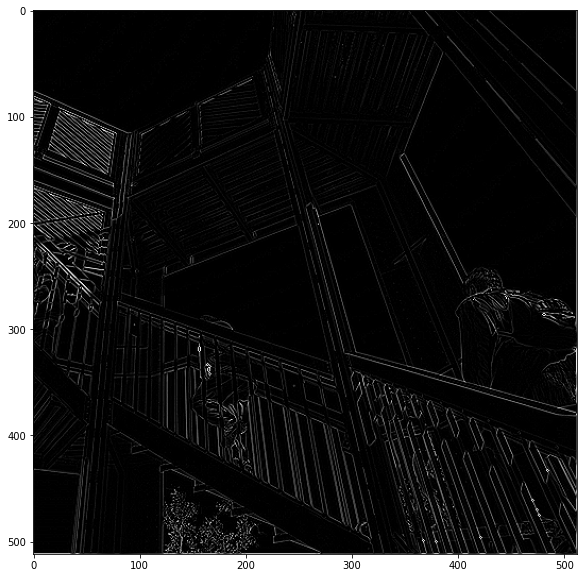

In [ ]:
# Plot the image. 
fig, ax = plt.subplots(figsize=(10, 10))
plt.gray()
plt.grid(False)

ax.imshow(image_transformed)
plt.show()

# Effect of Max Pooling

Here, we will see what is the effect of Max Pooling. We will do a 2x2 max pooling. 

Similarly, we will iterate over the image, and look at the pixel and its immediate neighbours to the right, beneath, and right-beneath. 

It will take the largest of them and load into the new image. 

Thus, the new image will be 1/4 the size of the old, with the dimensions on `X` and `Y` being halved by this process. 

In [29]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
new_image = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Get only the largest value and assign to the reduced image
        new_image[int(x/2), int(y/2)] = max(pixels)

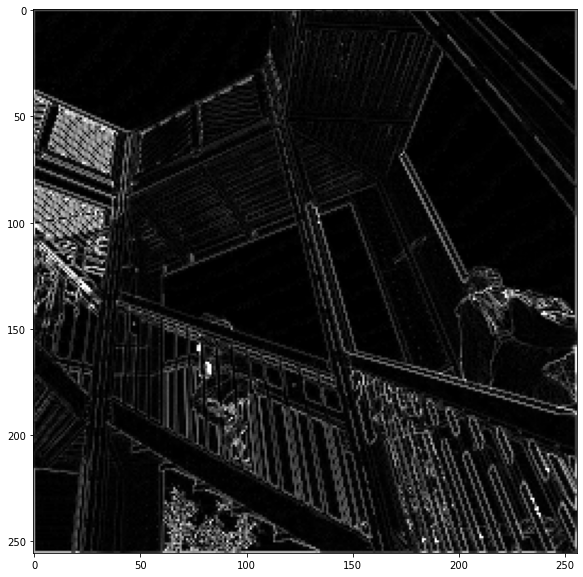

In [31]:
# Plot the image. 
fig, ax = plt.subplots(figsize=(10, 10))
plt.gray()
plt.grid(False)

ax.imshow(new_image)
plt.show()